# (Exploration of  Ford GoBike data)
## by (Hadeer Ismail Gado)

## Preliminary Wrangling

> Ford GoBike data describes individual rides in Bikesharing system all over Francisco Bay area.Tis include information about trip duration,start and end stations information, user type and information about this user for 183412 trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Loading Data

In [2]:
#Load data and show headers
bike_df = pd.read_csv('fordgobike-tripdata.csv')
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#Use shape to get the structure of the data
bike_df.shape

(183412, 16)

In [4]:
# get the types of data columns
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
bike_df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
#check null values
bike_df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
member_birth_year           True
member_gender               True
bike_share_for_all_trip    False
dtype: bool

In [7]:
#check for duplicated data
bike_df.duplicated().sum()

0

### What is the structure of your dataset?

> Ford GoBike dataset include 183412 record for trips data covering San Francisco Bay area. with 16 Features like start and end station, trip duration, bike identifier and user data like user type, gender and birthyear.
183412 row x 16 column.

### What is/are the main feature(s) of interest in your dataset?

> In this project, I'm interested in the relationship between user_type, gender, age and trip duration. Discovering the most popular station.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that age affects on trip duration and number of trips. Also expect that number of Males user will be greater than females. Most popular station will be affected by most crowded station. 



## Data Wrangling
##### Quality Issues:
   - Start & end time columns are string
   - start & end station id is float
   - member birthyear is float
   - Null values in station id & names , member birthyear and gender.
   
##### Tideness Issues
   - user data and trip data in the same table. 
   

In [68]:
#Take a copy from dataframe
bike_df_copy = bike_df.copy()

In [69]:
# Covert satrt time & end time column to timestamp
bike_df_copy.start_time = pd.to_datetime(bike_df_copy.start_time)
bike_df_copy.end_time = pd.to_datetime(bike_df_copy.end_time)
#check dtypes of previous column
print(bike_df_copy.start_time.dtype)
print(bike_df_copy.end_time.dtype)

datetime64[ns]
datetime64[ns]


In [70]:
#Drop Null values in dataset
bike_df_copy = bike_df_copy.dropna(axis=0)

In [71]:
bike_df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [72]:
bike_df_copy.shape[0]

174952

In [73]:
#convert start_station_id and en_station_id to int
bike_df_copy.start_station_id = bike_df_copy.start_station_id.astype('int')
bike_df_copy.end_station_id = bike_df_copy.end_station_id.astype('int')
#check dtype of previous columns
print(bike_df_copy.start_station_id.dtype)
print(bike_df_copy.end_station_id.dtype)

int32
int32


In [74]:
#convert birthyear to int
bike_df_copy.member_birth_year = bike_df_copy.member_birth_year.astype('int')
#check dtype of birthyear column
print(bike_df_copy.member_birth_year.dtype)

int32


## Univariate Exploration


### Gender 

(-1.1906667606207975,
 1.2167610660055928,
 -1.1982136516305346,
 1.2092141749958556)

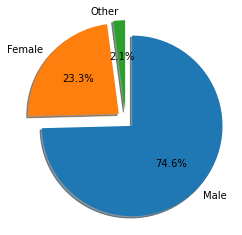

In [75]:
#Create pie chart for users gender
gender_count = bike_df_copy.member_gender.value_counts()
plt.pie(gender_count, labels=gender_count.index,startangle=90, counterclock=False, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1, 0.1) )
#Apply scaling to the plot to be equal on both the x- and y-axes. 
plt.axis('square')

- The previous pie chart shows that Male users are 74.6% of users in GoBike dataset. 
- Female users are 23.3%.
- As expected Male users are greater than Female users.




### Type of user (Customer, Subscriber)

(-1.0780016048338943,
 1.3380652745626007,
 -1.2106376582584573,
 1.2054292211380377)

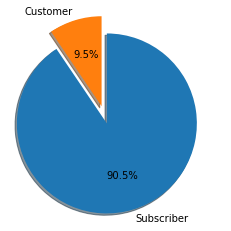

In [76]:
#Create pie chart for users type
user_type_count = bike_df_copy.user_type.value_counts()
plt.pie(user_type_count, labels=user_type_count.index,startangle=90, counterclock=False, autopct='%1.1f%%',shadow=True,explode=(0.1, 0.1) )
#Apply scaling to the plot to be equal on both the x- and y-axes. 
plt.axis('square')

- Number of subscriber is much greater than number of customers.
- 90.5% of users are subscribers.
- 9.5% of users are customers.




### Member BirthYear

Text(0.5, 0, 'BirthYear')

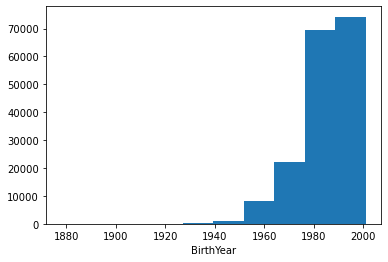

In [77]:
plt.hist(data=bike_df_copy , x='member_birth_year')
plt.xlabel('BirthYear')

 - As expected younger people who were born between 1980 and 2000 largely exceeds older people
 <br>
 <br>
 <br>
 <br>
 
 - Zoom into Birthyear between 1970 and 2000


(1970.0, 2000.0)

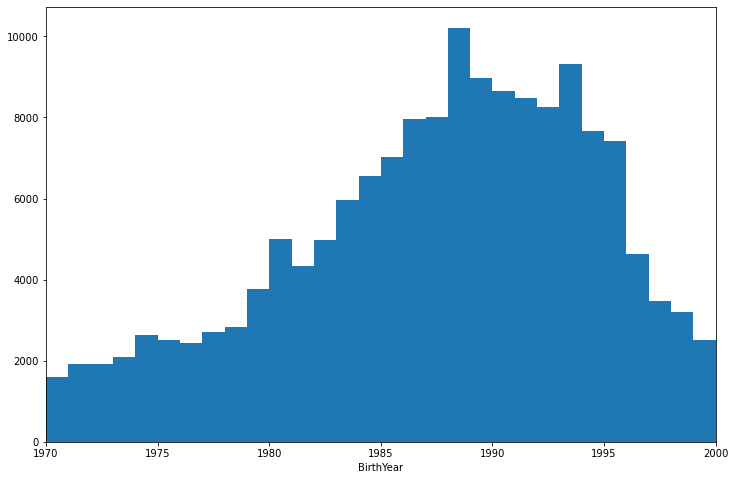

In [95]:
plt.figure(figsize=[12,8])
bins = np.arange(bike_df_copy.member_birth_year.min(), bike_df_copy.member_birth_year.max()+1 , 1 )
plt.hist(data=bike_df_copy , x='member_birth_year', bins=bins)
plt.xlabel('BirthYear')
plt.xlim(1970, 2000)

- Most popular user birthday is 1988. with user age around 30.

- We need to check data with member birthyear < 1920

In [100]:
bike_df_copy.query('member_birth_year < 1920')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900,Male,Yes
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900,Male,No
16087,1131,2019-02-27 08:37:36.864,2019-02-27 08:56:28.022,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,4968,Subscriber,1900,Male,No
19375,641,2019-02-26 17:03:19.855,2019-02-26 17:14:01.619,9,Broadway at Battery St,37.798572,-122.400869,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,6164,Customer,1900,Male,No
21424,1424,2019-02-26 08:58:02.904,2019-02-26 09:21:47.749,375,Grove St at Masonic Ave,37.774836,-122.446546,343,Bryant St at 2nd St,37.783172,-122.393572,5344,Subscriber,1900,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171996,1368,2019-02-03 17:33:54.607,2019-02-03 17:56:42.949,37,2nd St at Folsom St,37.785000,-122.395936,375,Grove St at Masonic Ave,37.774836,-122.446546,4988,Subscriber,1900,Male,No
173711,993,2019-02-03 09:45:30.464,2019-02-03 10:02:04.169,375,Grove St at Masonic Ave,37.774836,-122.446546,36,Folsom St at 3rd St,37.783830,-122.398870,5445,Subscriber,1900,Male,No
177708,1527,2019-02-01 19:09:28.387,2019-02-01 19:34:55.963,343,Bryant St at 2nd St,37.783172,-122.393572,375,Grove St at Masonic Ave,37.774836,-122.446546,5286,Subscriber,1900,Male,No
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25,Howard St at 2nd St,37.787522,-122.397405,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902,Female,No


<br>


- Aroud 72 trip was made by user over 100 years old!!
<br>
<br>

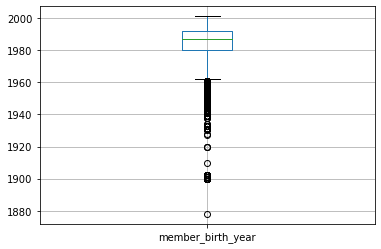

In [101]:
bike_df_copy.boxplot(column=['member_birth_year'])

- Boxplot shows number of outliers, our interest will be on people who were born before 1920. Those people were over 100 years old(72 entries). our interest will be on people who were born on 1878.

In [56]:
bike_df_copy.query('member_birth_year < 1900')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,-122.419724,6436,Customer,1878,Female,No


In [103]:
#Replace unreal birthyear value
bike_df_copy.loc[(bike_df_copy.member_birth_year == 1878),'member_birth_year']=1978
#test replacement
bike_df_copy.query('member_birth_year < 1900')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip



<br>

## Trip Duration

In [106]:
bike_df_copy.duration_sec.describe()

count    174952.000000
mean        704.002744
std        1642.204905
min          61.000000
25%         323.000000
50%         510.000000
75%         789.000000
max       84548.000000
Name: duration_sec, dtype: float64

- Max trip duration is 84548 seconds!! 23Hours. we will create box plot to figure out outliers.

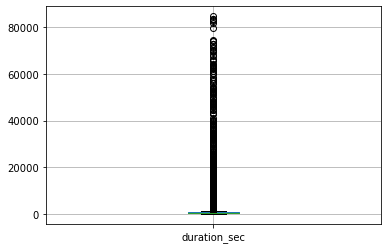

In [111]:
bike_df_copy.boxplot(column=['duration_sec'])

In [121]:
bike_df_copy.query('duration_sec >30000')

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No
779,36190,2019-02-28 10:30:03.377,2019-02-28 20:33:14.228,58,Market St at 10th St,37.776619,-122.417385,375,Grove St at Masonic Ave,37.774836,-122.446546,5465,Subscriber,1991,Female,No
2544,31633,2019-02-28 09:20:43.087,2019-02-28 18:07:56.344,81,Berry St at 4th St,37.775880,-122.393170,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,2270,Customer,1984,Female,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174403,67512,2019-02-01 23:54:03.833,2019-02-02 18:39:16.575,19,Post St at Kearny St,37.788975,-122.403452,6,The Embarcadero at Sansome St,37.804770,-122.403234,2769,Subscriber,1996,Male,No
176130,59813,2019-02-01 19:54:49.848,2019-02-02 12:31:43.043,60,8th St at Ringold St,37.774520,-122.409449,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,335,Subscriber,1990,Female,No
177144,51488,2019-02-01 17:22:49.870,2019-02-02 07:40:58.473,207,Broadway at Coronado Ave,37.835788,-122.251621,253,Haste St at College Ave,37.866418,-122.253799,847,Subscriber,1997,Male,Yes
177279,30767,2019-02-01 15:44:06.638,2019-02-02 00:16:53.653,62,Victoria Manalo Draves Park,37.777791,-122.406432,63,Bryant St at 6th St,37.775910,-122.402575,1401,Customer,1988,Male,No


Text(0.5, 0, 'Duartion in Seconds')

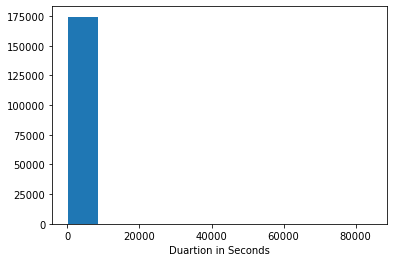

In [145]:
plt.hist(data=bike_df_copy, x='duration_sec')
plt.xlabel('Duartion in Seconds')

(0.0, 230.0)

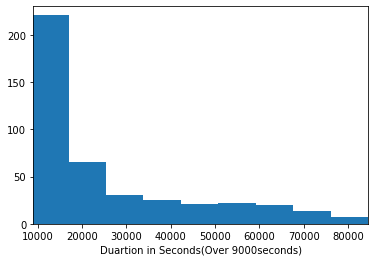

In [131]:
plt.hist(data=bike_df_copy, x='duration_sec')
plt.xlim((9000, bike_df_copy.duration_sec.max()))
plt.xlabel('Duartion in Seconds(Over 9000seconds)')
plt.ylim((0,230))

- Zooming in duration greater than 9000 seconds. shows that duration is right skewed with long tail.
- we will apply transformation for the trip duration.

In [132]:
np.log10(bike_df_copy.duration_sec.describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

Text(0.5, 0, 'Duration (Seconds)')

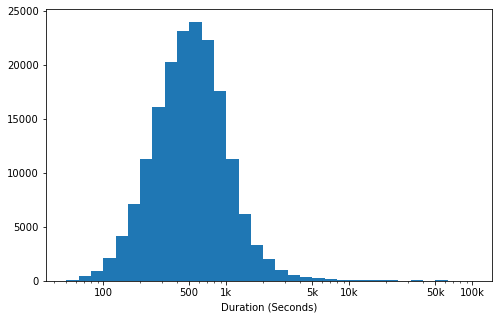

In [144]:
#  plot duration on a log scale
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(bike_df_copy['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_df_copy, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 500, 1e3, 5e3, 1e4, 5e4, 1e5], [100, 500, '1k', '5k', '10k', '50k', '100k'])
plt.xlabel('Duration (Seconds)')


 - In the First histogram we found that the duration were almost included in one large bin size, so in the second plot we zoomed in duration greater than 9000seconds. this proved that duration are highly skewed with a long tail. In the third plot,we used log to transform the skewed data, with the log distribution of data is nearly normally distributed with peak around 600 seconds.

In [149]:
#Average duration with number of outliers
bike_df_copy.duration_sec.mean()

704.0027436096758

In [156]:
#Create sub dataframe excluding outliers
bike_main_duration = bike_df_copy.query('duration_sec <= 20000')
bike_main_duration.duration_sec.mean()

661.3240034557928

Text(0.5, 0, 'Duration (Seconds)')

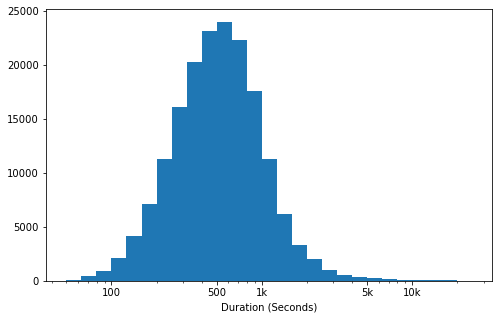

In [157]:
#  plot main duration on a log scale
log_binsize = 0.1
bins = 10 ** np.arange(1.7, np.log10(bike_main_duration['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_main_duration, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([100, 500, 1e3, 5e3, 1e4], [100, 500, '1k', '5k', '10k'])
plt.xlabel('Duration (Seconds)')

<br>
<br>

## Most Frequent Stations

Text(0, 0.5, 'Latitude')

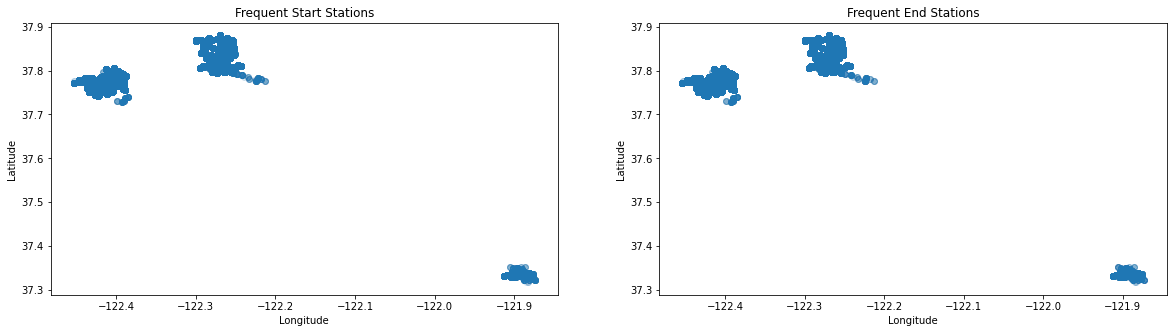

In [163]:
plt.figure(figsize=[20,5])
#plot start station long,lat
#One row, 2 columns, First plot
plt.subplot(1,2,1)
plt.scatter(data=bike_main_duration, x= 'start_station_longitude' ,y='start_station_latitude', alpha=0.04)
plt.title('Frequent Start Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#One row, 2 columns, Second plot
plt.subplot(1,2,2)
plt.scatter(data=bike_main_duration, x= 'end_station_longitude' ,y='end_station_latitude', alpha=0.04)
plt.title('Frequent End Stations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

- There are nearly 3 frequent location in both start and end stations.

In [167]:
#Calculate Age from birthyear, by subtracting Birthyear from 2019(trip year)
bike_main_duration['member_age'] = 2019 - bike_main_duration.member_birth_year

<ipython-input-167-37d7ebc1cbdc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_main_duration['member_age'] = 2019 - bike_main_duration.member_birth_year


In [168]:
bike_main_duration.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.24878,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.40595,5200,Subscriber,1959,Male,No,60


(array([5.6615e+04, 7.2564e+04, 2.7752e+04, 1.2889e+04, 4.1080e+03,
        6.4900e+02, 1.2500e+02, 3.0000e+00, 3.0000e+00, 7.1000e+01]),
 array([ 18. ,  28.1,  38.2,  48.3,  58.4,  68.5,  78.6,  88.7,  98.8,
        108.9, 119. ]),
 <a list of 10 Patch objects>)

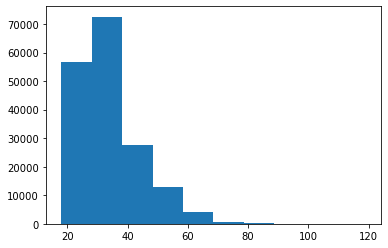

In [169]:
plt.hist(data=bike_main_duration, x='member_age')

- Most Frequent age is Around 30, Right skewed with long tail.

Text(0.5, 0, 'Age')

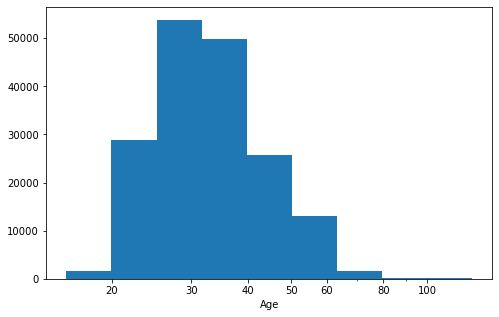

In [172]:
#  plot Age on a log scale
log_binsize = 0.1
bins = 10 ** np.arange(1.2, np.log10(bike_main_duration['member_age'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bike_main_duration, x = 'member_age', bins = bins)
plt.xscale('log')
plt.xticks([20, 30, 40, 50, 60, 80, 100], [20, 30, 40, 50, 60, 80, 100])
plt.xlabel('Age')

In [174]:
#Filter data with age <=100 to be our main data
bike_main = bike_main_duration.query('member_age <= 100')
bike_main.sample(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
45797,141,2019-02-22 11:22:05.765,2019-02-22 11:24:27.399,85,Church St at Duboce Ave,37.770083,-122.429156,95,Sanchez St at 15th St,37.766219,-122.431060,5027,Subscriber,1971,Male,No,48
65574,339,2019-02-20 09:30:39.483,2019-02-20 09:36:19.424,95,Sanchez St at 15th St,37.766219,-122.431060,223,16th St Mission BART Station 2,37.764765,-122.420091,3087,Subscriber,1985,Male,No,34


In [175]:
bike_main.member_age.describe()

count    174708.000000
mean         34.162654
std           9.975583
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          99.000000
Name: member_age, dtype: float64

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Data shows that Males users are much greater than female and other users.
- Number of subscribers is much greater than number of customers. Customers are nearly 10% of users.
- Most subscribers are between 29-37 years old. with minimum age about 18 years old. Age above 100 was filtered out as we expected those are outliers.
- Start and end stations equipped the same 3 spots on the scatterplot.
- Trip Duration in seconds. Data Max trip duration is 84548 seconds!! 23Hours.this was illogical or rare. We excluded trip duration greater than 20000. found the average duration was around 600 seconds.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Some data was plotted as right skewed and we used log transformation to make the data normally distributed. Foud outliers in trip duration and birthyear or age, these outliers was extracted.

## Bivariate Exploration



### Duration Vs. BirthYear/Age
- Plot correlation between between numeric variables(age, duration).

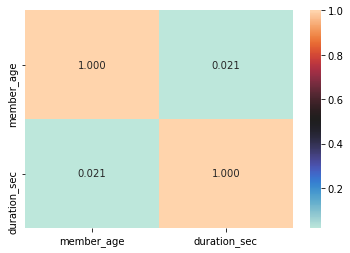

In [185]:
# correlation plot
sb.heatmap(bike_main[['member_age','duration_sec']].corr(), annot = True, fmt = '.3f',cmap = 'icefire')

- There is weak correlation between Age and Trip duration.

Text(0, 0.5, 'Duration (sec)')

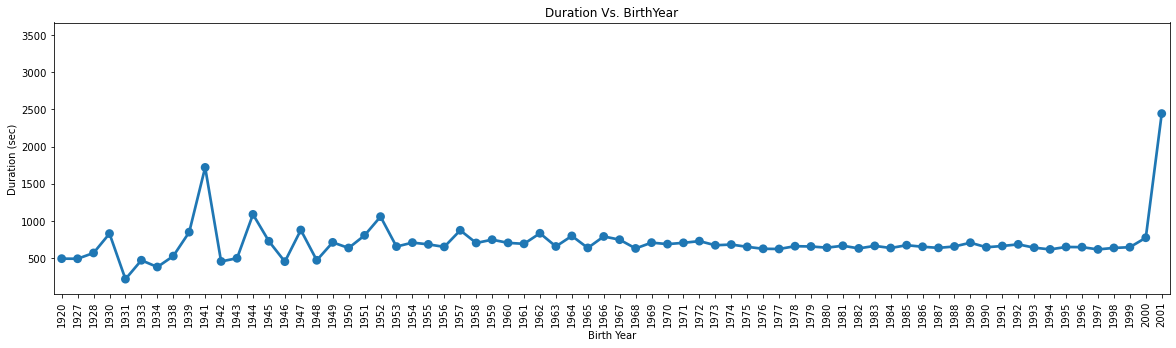

In [189]:
#Point plot shows the average trip duration for every birthyear
plt.figure(figsize=[20,5])
sb.pointplot(data=bike_main, x='member_birth_year', y='duration_sec',errwidth=0)
plt.xticks(rotation=90)
plt.title('Duration Vs. BirthYear')
plt.xlabel('Birth Year')
plt.ylabel('Duration (sec)')

### Duration Vs. Member Gender

Text(0, 0.5, 'Duration (Sec)')

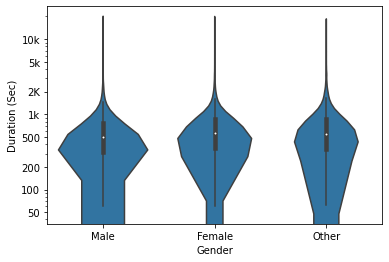

In [194]:
base_color = sb.color_palette()[0]

y_ticks = [50, 100,200, 500, 1e3, 2e3, 5e3, 1e4]
y_labels = [50, 100,200, 500, '1k','2K', '5k', '10k']
sb.violinplot(data=bike_main, x='member_gender', y='duration_sec', color=base_color, innner='quartile')
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('Gender')
plt.ylabel('Duration (Sec)')

-Average trip duration are approximately the same for male, females and others.

### Duration Vs. User type

Text(-9.075000000000003, 0.5, 'Duration (Sec)')

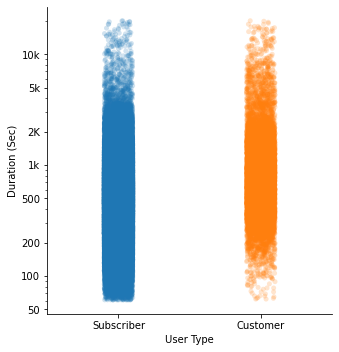

In [198]:
y_ticks = [50, 100,200, 500, 1e3, 2e3, 5e3, 1e4]
y_labels = [50, 100,200, 500, '1k','2K', '5k', '10k']
sb.catplot(data=bike_main, x='user_type', y='duration_sec',alpha = 0.2)
plt.yscale('log')
plt.yticks(y_ticks, y_labels)
plt.xlabel('User Type')
plt.ylabel('Duration (Sec)')

- Number of subscribers are 90% of users and their trip duration are spread out and number of trip duration starts to decrease over 5000Seconds.On The other hand, Customers are 10% of users. Trip duration are concentrated between 200 - 4000 seconds. 

### User Type Vs. Gender

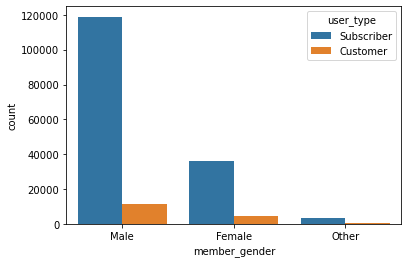

In [202]:
sb.countplot(data = bike_main, x = 'member_gender', hue = 'user_type')

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- There is weak correlation between Age and Trip duration. but long duration exists more on younger people.
- when comparing Age and trip duration, Found that maximum trip duration was made by youngest user(minimum age).
- Average trip duration are approximately the same for male, females and others.
- Number of subscribers are 90% of users and their trip duration are spread out largely from minimum duration untill Duration equal to 4000 seconds, but number of trip duration starts to decrease over 5000Seconds.On The other hand, Customers are 10% of users. Trip duration are concentrated between 200 - 4000 seconds.
- When plotting number of each gender with user type(subscriber, customer). Maximum number of subscription wasfor males as they have a big proportion of trips data.



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- Comparing gender with trip duration,Females were expected to have the shortest trip duration, but males have the big proportion in short trip duration.

## Multivariate Exploration


### Duration, Birthyear and User type.

Text(0, 0.5, 'Duration (sec)')

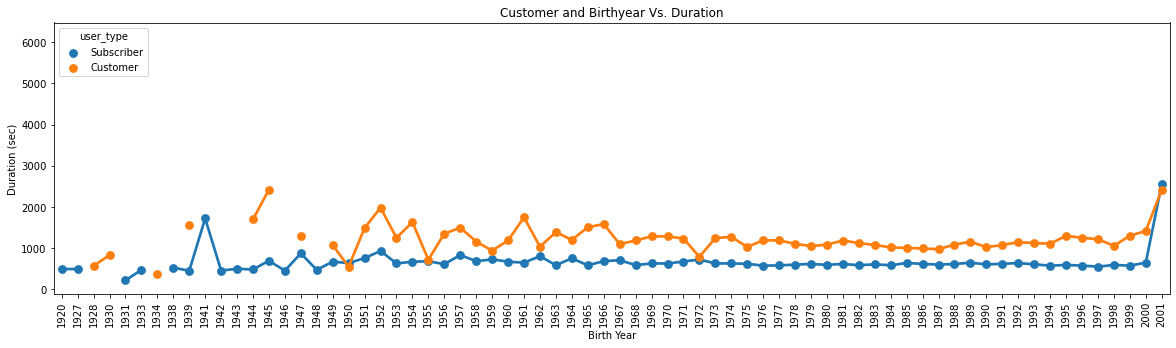

In [211]:
#Point plot shows the average trip duration for every birthyear from different user types
plt.figure(figsize=[20,5])
sb.pointplot(data=bike_main, x='member_birth_year', y='duration_sec',hue='user_type', errwidth=0)
plt.xticks(rotation=90)
plt.title('Customer and Birthyear Vs. Duration')
plt.xlabel('Birth Year')
plt.ylabel('Duration (sec)')

- Customer trip duration in almost all birthyears was greater than subscribers trip duration.

Text(0, 0.5, 'Duration (sec)')

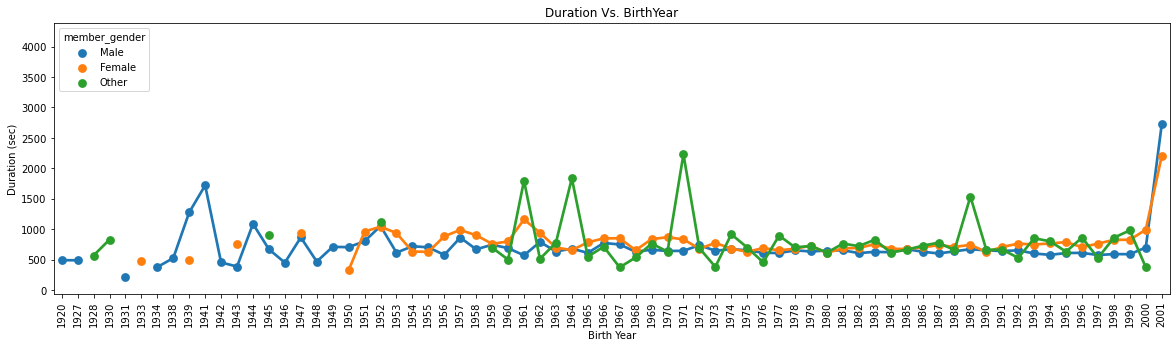

In [206]:
#Point plot shows the average trip duration for every birthyear with different gender
plt.figure(figsize=[20,5])
sb.pointplot(data=bike_main, x='member_birth_year', y='duration_sec',hue='member_gender', errwidth=0)
plt.xticks(rotation=90)
plt.title('Duration Vs. BirthYear')
plt.xlabel('Birth Year')
plt.ylabel('Duration (sec)')

- older Females who were born from 1920 to 1949 have slight number of trips, Older males have two apikes in trip duration. others have number of spikes in the middle age.

In [209]:
bike_main.shape

(174708, 17)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Customer trip duration in almost all birthyears was greater than subscribers trip duration.
- older Females who were born from 1920 to 1949 have slight number of trips.
- Older males have two apikes in trip duration.
- others have number of spikes in the middle age.

### Were there any interesting or surprising interactions between features?

- Old Male users who were born on 1939-1941 made a spike in pointplot with average trip duration equal to 1800 seconds.
- Number of spikes of Other gender was surprising also, compared to male and fmales average trip duration

In [207]:
#Save Cleaned data in csv format
bike_main.to_csv('bike_clean.csv', index=False)